# Exploring User-Generated Content (UGC) and Cross-Cultural Impact on YouTube: Insights from Chinese Dramas

### DIGHUM 101 Joanna Lan

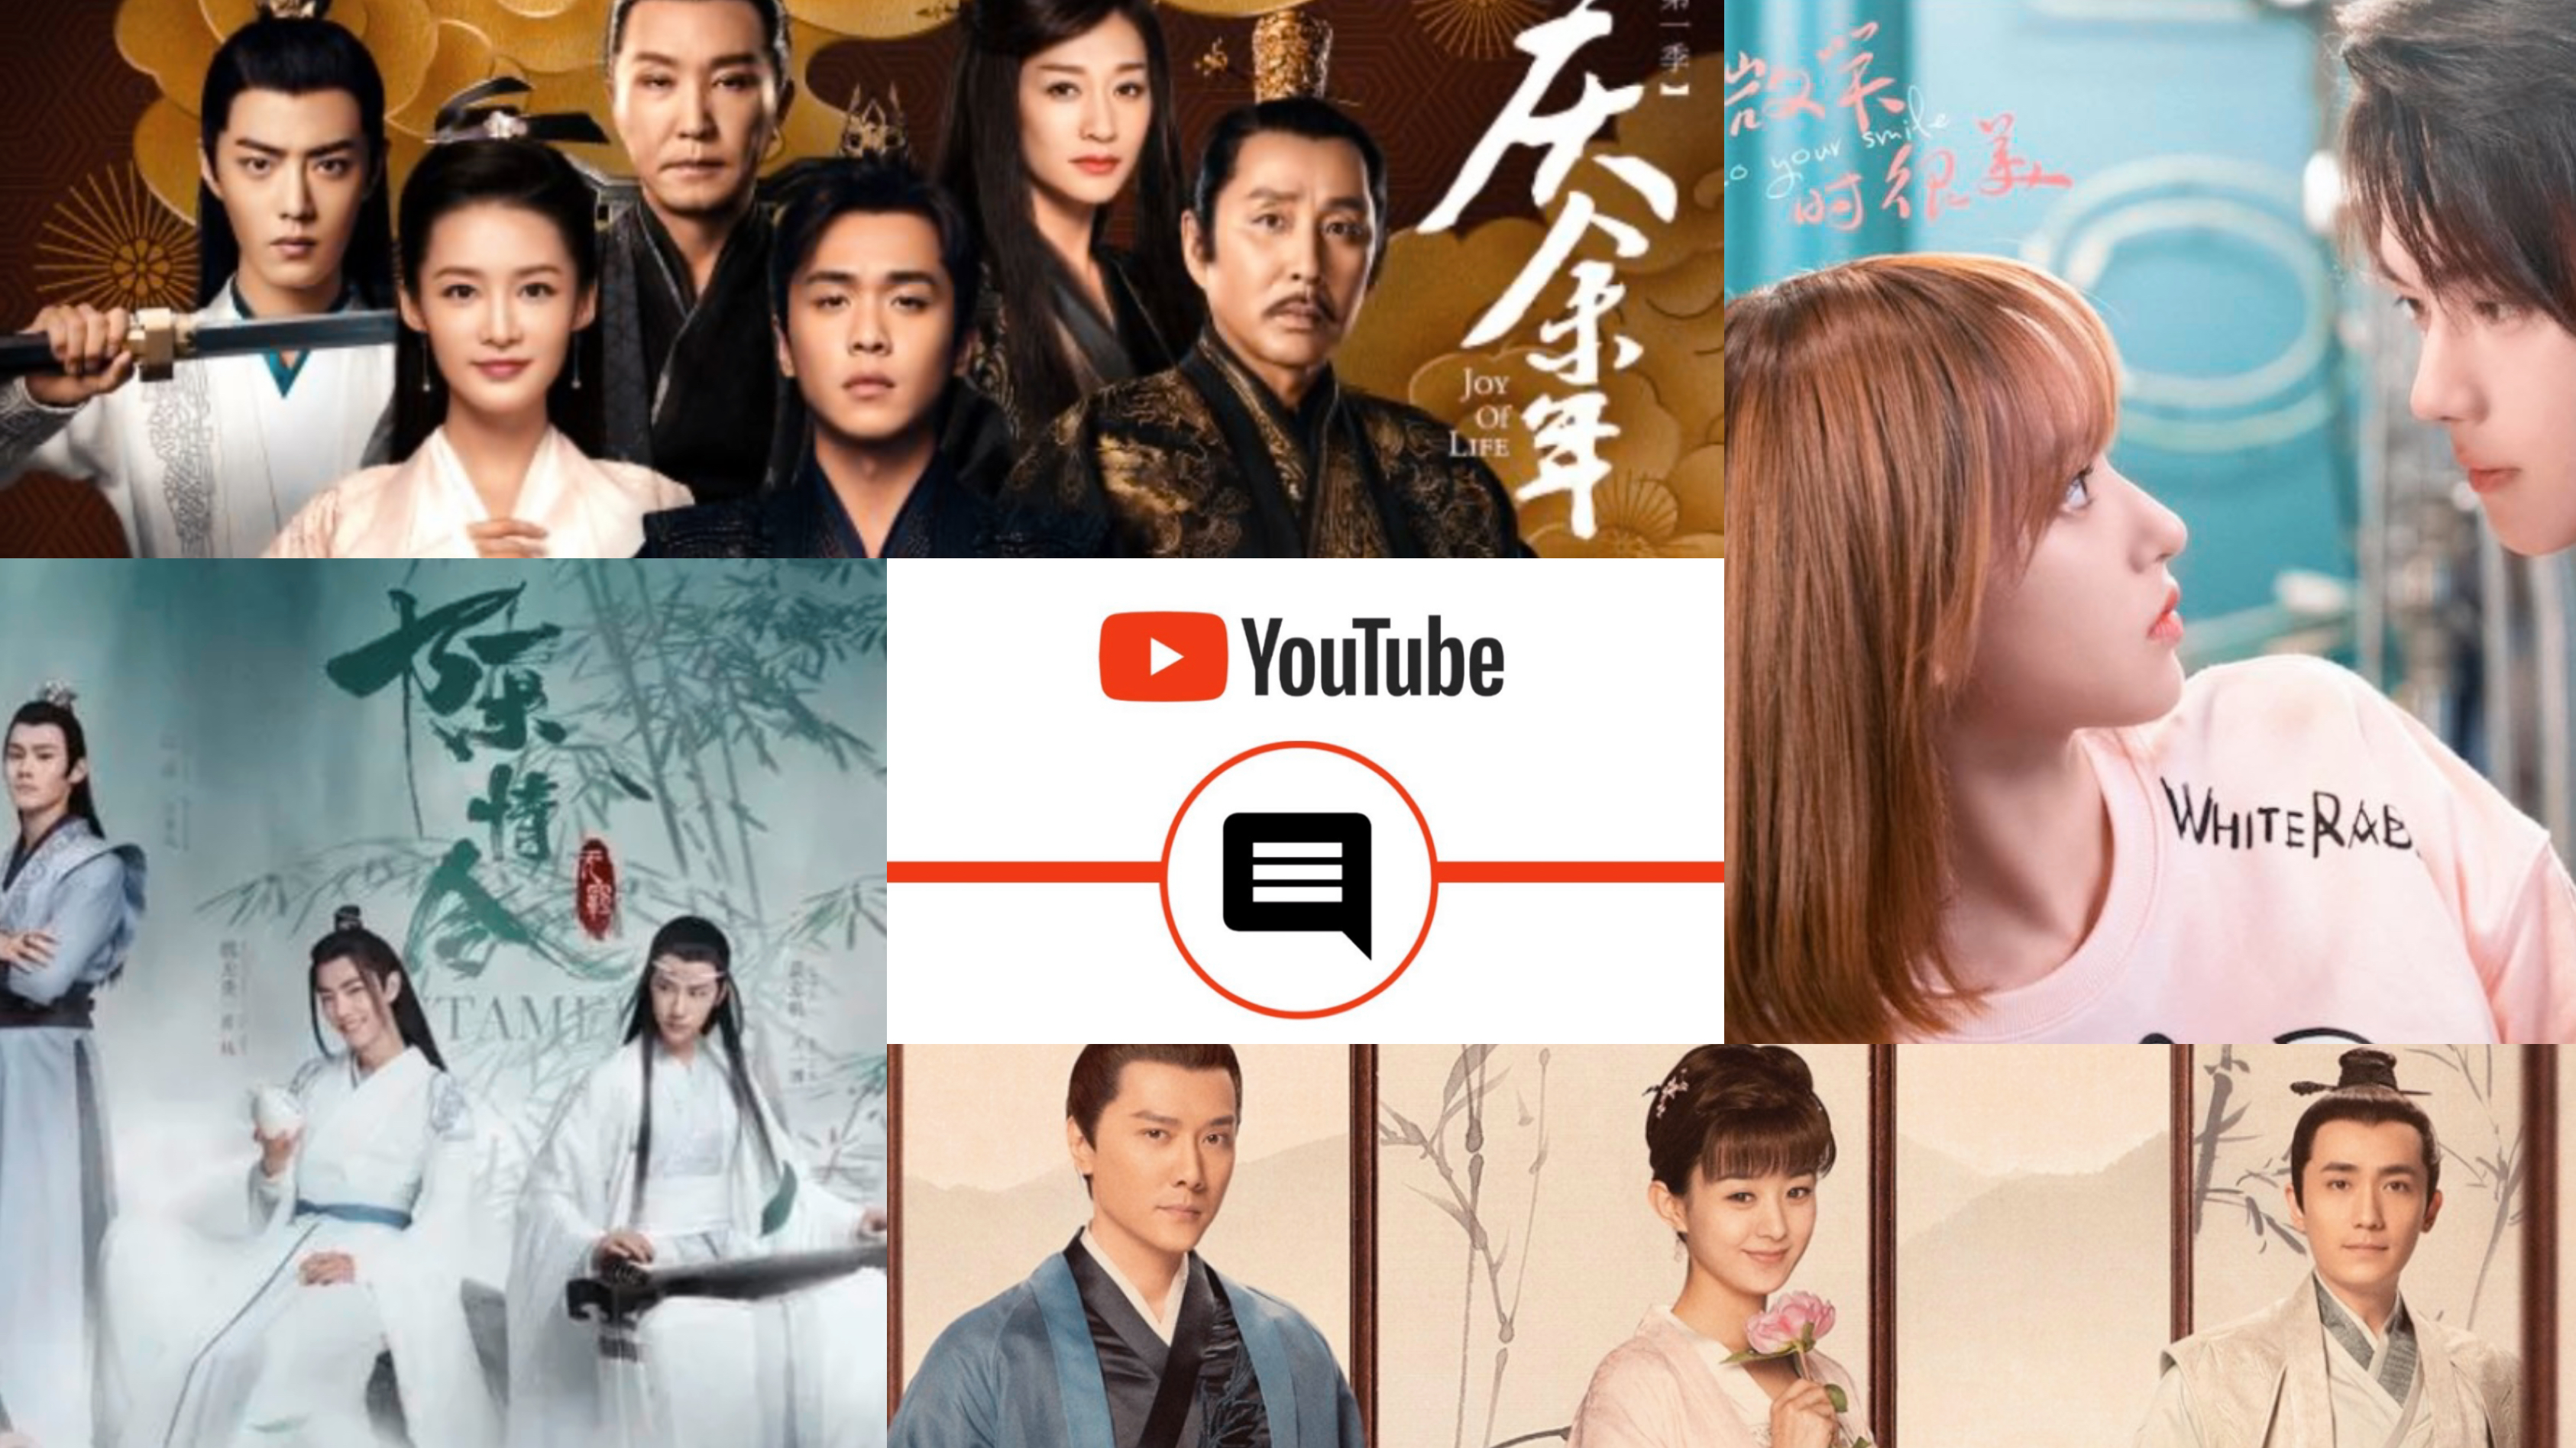


## Background

**YouTube has emerged as a prominent platform for individuals to share user-generated content (UGC), including videos and comments, enabling the expression of opinions, experiences, and reactions to various topics**. However, the introduction of user responses has raised concerns about provocative, mocking, and discriminatory comments among YouTube commentators, leading to controversy (Guo, 2022). **While previous studies have primarily focused on viewers' reactions to Western contents on YouTube, the responses and reactions of viewers to the contents with non-Western background remain largely unexplored.**
    
    
## Research Focus: User-Generated Content (UGC) and Chinese Dramas on YouTube

The popularity of YouTube has played a crucial role in raising awareness of Asian cultures, particularly the explosive rise of East Asian popular culture worldwide. YouTube has become a platform for creating and sharing entertainment and UGC related to Korean music, film, and television, Japanese anime, and notably, Chinese television dramas. **This cross-cultural content challenges the dominance of American media culture in the global market and provides opportunities for non-Western producers, distributors, and consumers to reach a global audience (Guo, 2021)**. As a Chinese individual living in the United States, I can personally attest to actively seeking and enjoying a diverse range of entertainment content produced by Chinese media, with a particular interest in Chinese television dramas (C-dramas). **Thus, the focus of this research project on UGCs on YouTube will be specifically on C-dramas.**
    
    
## Relevance and Significance

**This research project brings a fresh perspective to the study of user-generated content on YouTube, explores English-speaking countries' user responses to non-Western YouTube video content, and provides insights into the impact of YouTube (or social media platforms) on global cultural flows**. It also offers practical methodologies for analyzing UGC and highlights the significance of user feedback for content development and marketing strategies.
     
     
## Research Question

**How do user responses and reviews on YouTube reflect the reactions to Chinese dramas in English-speaking countries?**


## Data Source

**Data Collection**: YouTube user responses from four selected C-dramas that were produced and uploaded on YouTube in the past five years.
    The selected dramas are:  
        1) _The Story Of MingLan_ (2018)  
        2) _Joy of Life_ (2019)  
        3) _The Untamed_ (2019)  
        4) _Falling Into Your Smile_ (2021)    
    **Note**: The selection of these dramas is based on two criteria: 1) rankings on American official websites ([https://www.imdb.com/search/title/?countries=cn&sort=user_rating&title_type=tv_series](https://www.imdb.com/search/title/?countries=cn&sort=user_rating&title_type=tv_series) & [https://mydramalist.com/shows/top?page=1](https://mydramalist.com/shows/top?page=1)) and 2) availability for streaming on YouTube.
    


  ## Start with the web scraping of comments of selected YouTube videos and store them

In [30]:
#!pip install beautifulsoup4
import requests
from bs4 import BeautifulSoup

In [ ]:
# Create a list of the selected YouTube video URLs
video_list = [
    'https://youtu.be/V_LKXIJCXfw',# URL for Video1
    'https://youtu.be/87veEAC0CY0',# URL for Video2
    'https://youtu.be/BfKhREVFLkQ',# URL for Video3
    'https://youtu.be/TFeO2fFXKzs',# URL for Video4
]

  Here, we are going to create a loop to iterate through each video URL, and use the `requests` library to send an `HTTP GET` request to each video page and retrieve its HTML content. After that we need to create a BeautifulSoup object and parsing the HTML content for web scraping. 

In [ ]:
# Loop through each video URL or ID
for video in video_list:
    # Send an HTTP GET request to the video page and retrieve its HTML content
    response = requests.get(video)
    html_content = response.text
    # Create a BeautifulSoup object and parse the HTML content
    soup = BeautifulSoup(html_content, 'html.parser')

  Then, we are now able to extract the comments of the selected YouTube videos by using the `BeautifulSoup` method.

In [ ]:
comment_elements = soup.find_all('yt-formatted-string', class_='style-scope ytd-comment-renderer')
for comment_element in comment_elements:
    comment_text = comment_element.text.strip()
    writer.writerow([comment_text])
print(comment_text)

  **Here, the way that we tried to scrape the YouTube video comments isn't get any output, thus we will going to try another way by using browser simulator `selenium`.**  
  Selenium is needed here because Youtube is JavaScript rendered, which BeautifulSoup cannot deal with.

In [1]:
!pip install selenium

In [2]:
import time
from selenium.webdriver import Chrome
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC

  Let's try one of the YouTube video URL and see whether it works. Because Youtube comments are dynamically loaded, which means that they are only visible when you scroll down the page. So we need a loop that will:

  1. Scroll down  
  2. Wait for comments to appear  
  3. Scrape the comments  
  4. Repeat for whatever range we want  
 
Here, we want to set the range in 5, which is 5 times, which can scrape about 50-80 comments.  
  

In [4]:
data_1=[]

with Chrome() as driver:
    wait = WebDriverWait(driver,15)
    driver.get("https://youtu.be/V_LKXIJCXfw")

    for item in range(5): 
        wait.until(EC.visibility_of_element_located((By.TAG_NAME, "body"))).send_keys(Keys.END)
        time.sleep(15)

    for comment in wait.until(EC.presence_of_all_elements_located((By.CSS_SELECTOR, "#content-text"))):
        data_1.append(comment.text)
print(data_1)

['sososo sweet drama: https://youtu.be/Zw2dbKgHWFE', "It's crazy how much YouTube and other streaming services like Netflix have opened this entire world of amazing drama and talent that has beeeeeen dominated and monopolized by American culture. Who would've thought I'd love Chinese dramas so much. Thanks for the subs making it accessible to so many of us.", "My absolute favorite drama, and I've seen many.  Love that it's so natural. No cringe moment. The relationship Ming Lan has with her grandma keeps me coming back.  I've lost count of how many times I've seen it.  Never gets old.", "The fabrics used in the costumes and the general environment has a more mature feel than other dramas I've watched. I like it, it seems more realistic than bright purple clothing.", 'I used to be a fan of Korean Dramas, but now, I am a big fan of C-dramas like Princess Agents, Eternal Love, Joy of life, Condor Heroes Trilogy, Legend of Fuyao, God of War Zhao Yun with favs actors like Mark Chao, Ethan J

  Here, we first access the URL we want with the driver.get function. And then, we scroll down and wait until everything is visible with `wait.until` and `EC.visibility_of_element_located`. And scrape the comments by finding all the `#content-text` elements (which is what we want, see below image for illustration) in the current viewed page.

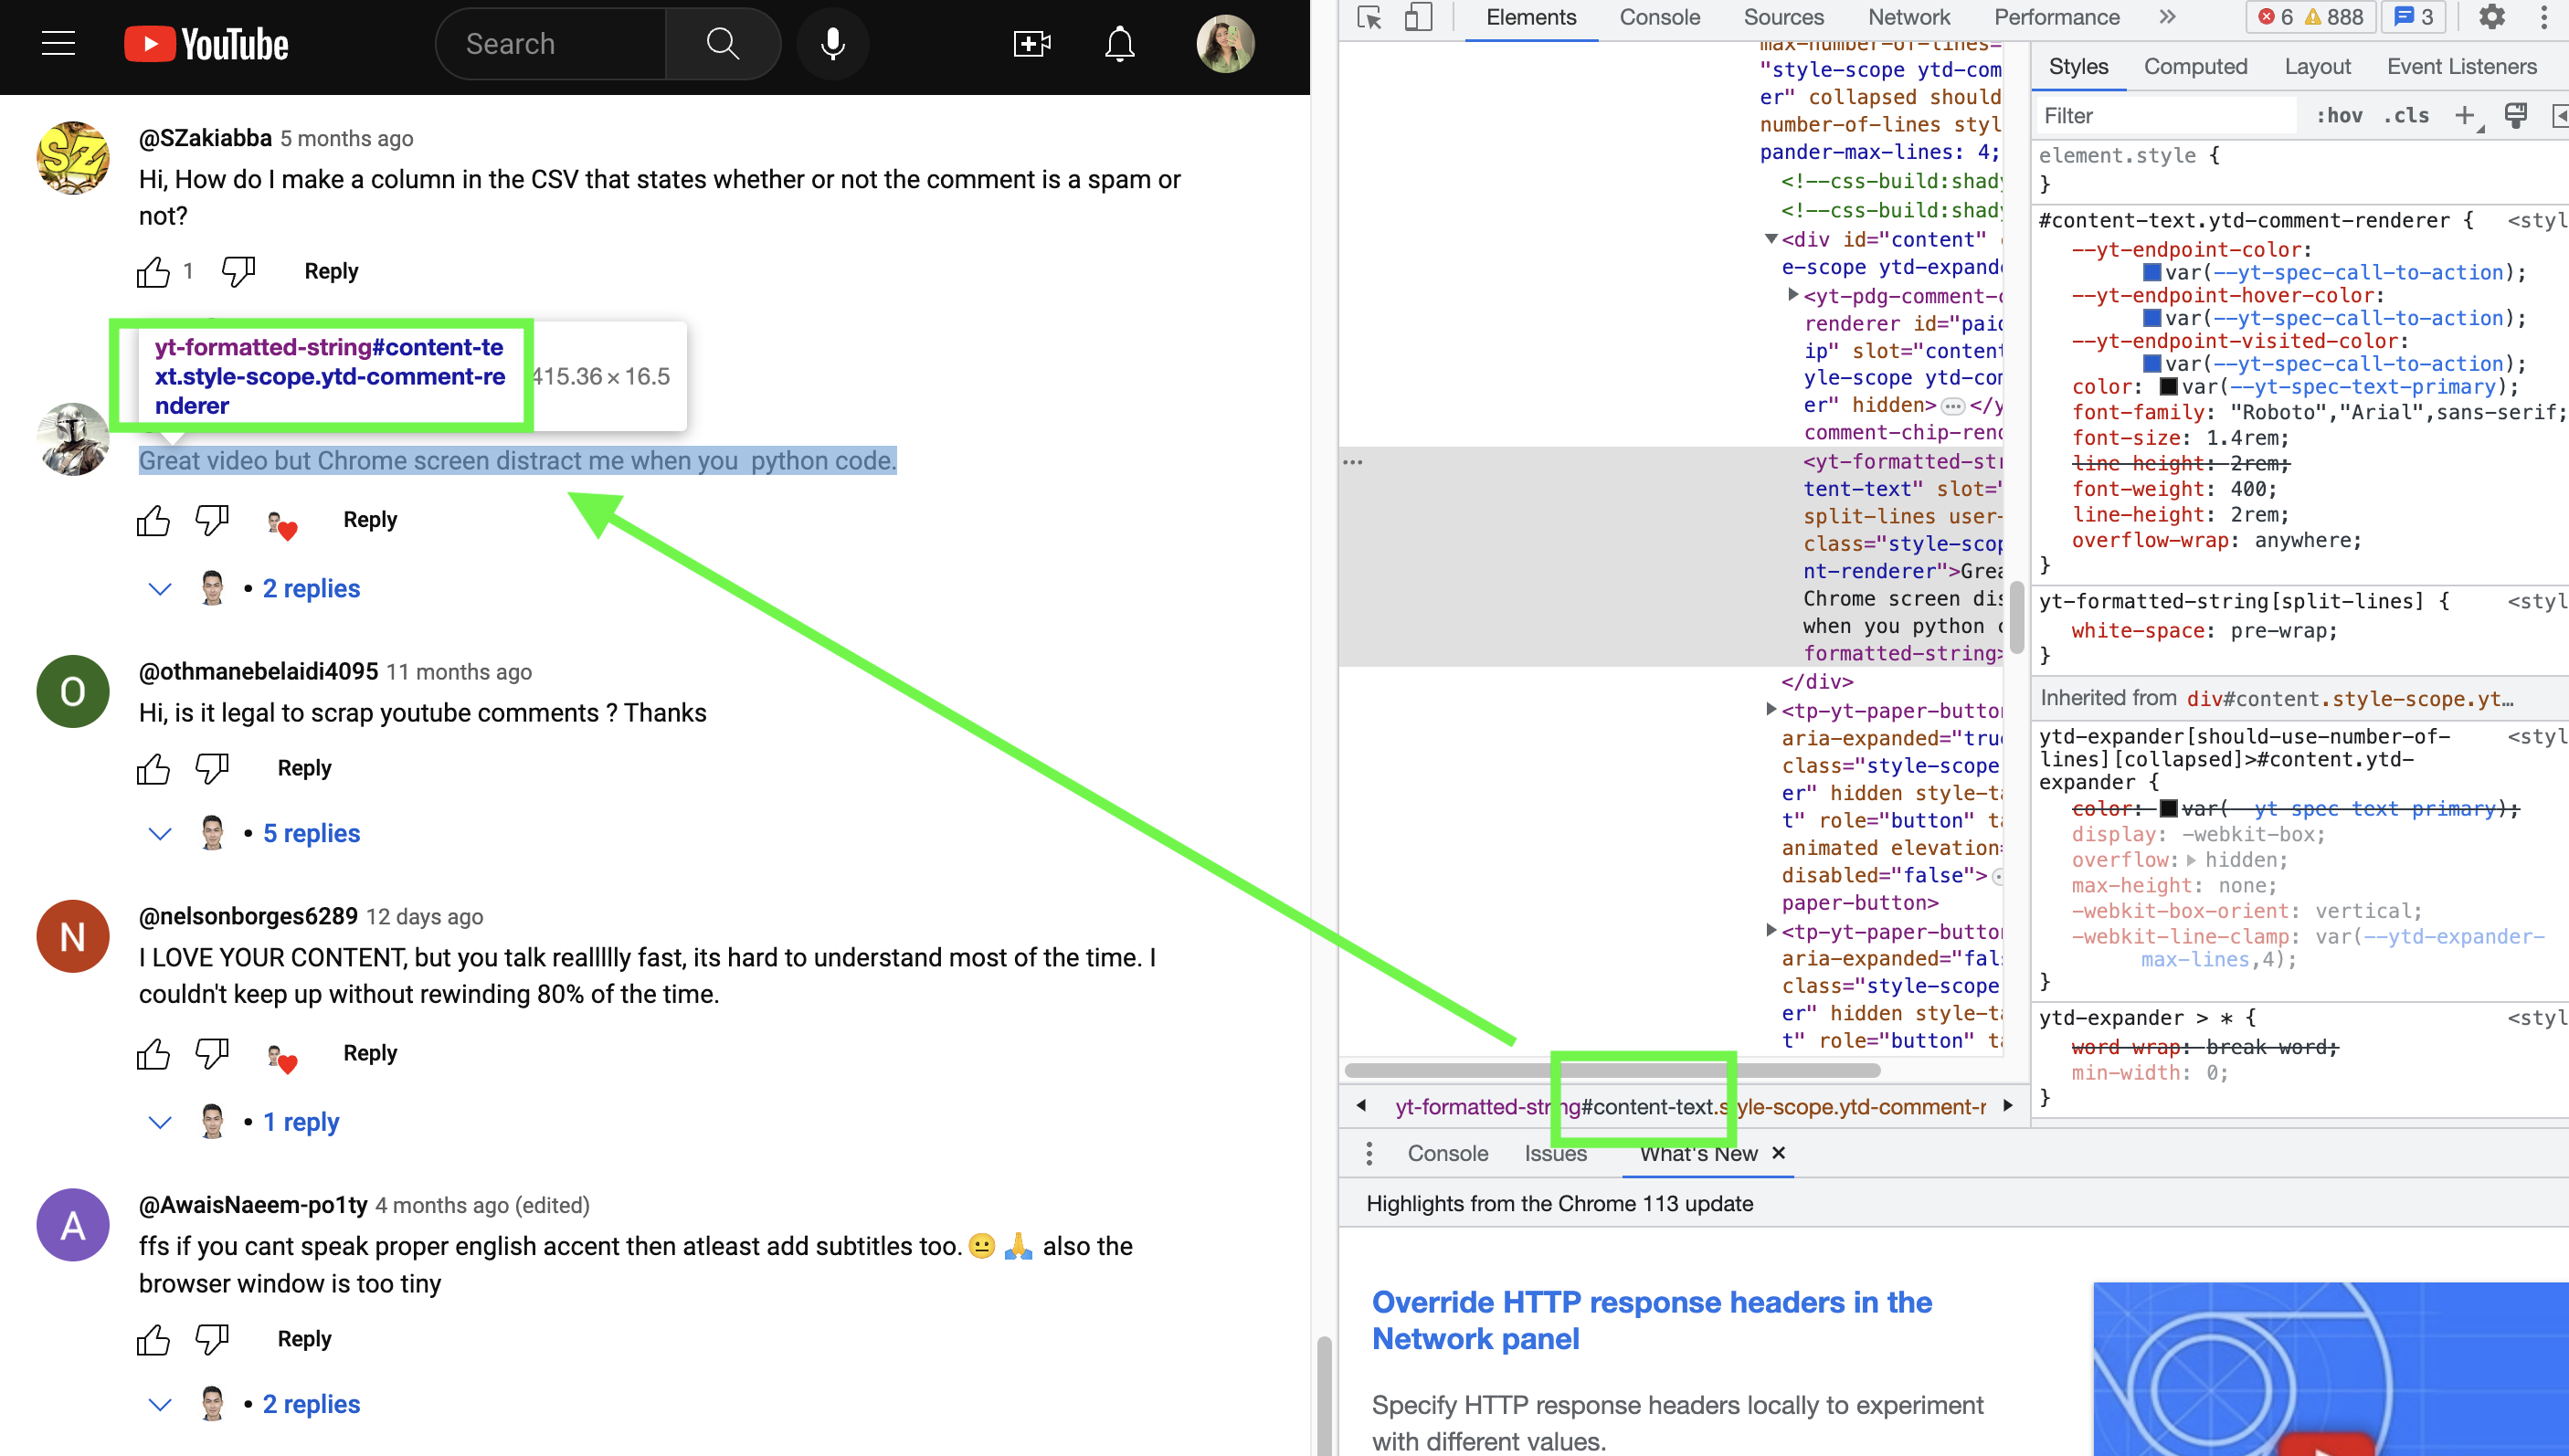

  And lastly, we need to append the comments to the data list.

  Now, let's see how many comments have we scraped and what the data looks like.  
  Here, we take the first 51 comments of what we scraped. By repeating for each video, and save these comments in different columns in a dataframe for each video.

In [5]:
# !pip install pandas
import pandas as pd   
df = pd.DataFrame(data_1[:51], columns=['Video1'])
len(df)

51

In [7]:
data_2=[]

with Chrome() as driver:
    wait = WebDriverWait(driver,15)
    driver.get("https://youtu.be/87veEAC0CY0")

    for item in range(5): 
        wait.until(EC.visibility_of_element_located((By.TAG_NAME, "body"))).send_keys(Keys.END)
        time.sleep(15)

    for comment in wait.until(EC.presence_of_all_elements_located((By.CSS_SELECTOR, "#content-text"))):
        data_2.append(comment.text)
print(data_2)

['Let me just say... This kid deserves an Oscar!!! I cried, laughed, whined, frowned and everything with him!! Many adult. actors are not even near to his level... Those facial expressions and tones are everything that I live for in a true actor!!!', "This kid is so cute and funny. Acting, checked. Facial expressions, checked. Eloquence, checked. Sense of humor, checked. He's a whole package! Hoping to see him often in upcoming dramas.", 'This boy is so talented! I\'ve been yearning for his drama after I watched "Heavenly Sword and Dragon Sabre" It feels so good to see him here again', 'This little kid should be given the award for best acting his really amazing.', 'So sad the little boy have to leave, such a great actor he is. He really deserve an ovation for lighting up the few scene he appeared in \n\nWho else wants to see the full face of Uncle Wu Zhu', "Yes I'm back for the 3rd time. Yes I'm aware that season 2 hasnt come out yet. Its all part of my diabolical scheme to rewatch th

In [8]:
df['Video2'] = data_2[:51]
df.head()

Video1  \
0   sososo sweet drama: https://youtu.be/Zw2dbKgHWFE   
1  It's crazy how much YouTube and other streamin...   
2  My absolute favorite drama, and I've seen many...   
3  The fabrics used in the costumes and the gener...   
4  I used to be a fan of Korean Dramas, but now, ...   

                                              Video2  
0  Let me just say... This kid deserves an Oscar!...  
1  This kid is so cute and funny. Acting, checked...  
2  This boy is so talented! I've been yearning fo...  
3  This little kid should be given the award for ...  
4  So sad the little boy have to leave, such a gr...

In [9]:
data_3=[]

with Chrome() as driver:
    wait = WebDriverWait(driver,15)
    driver.get("https://youtu.be/BfKhREVFLkQ")

    for item in range(5): 
        wait.until(EC.visibility_of_element_located((By.TAG_NAME, "body"))).send_keys(Keys.END)
        time.sleep(15)

    for comment in wait.until(EC.presence_of_all_elements_located((By.CSS_SELECTOR, "#content-text"))):
        data_3.append(comment.text)
print(data_3)

['Do you want some merch?Come get it now!', 'I think we can all collectively agree that no one’s ever going to get over this show', "Re-watching this masterpiece again in 2023. I can't seriously get over this drama, specially our Lan Zhan and Wei Wuxian  Hats off to all the people who got involved in the production of this", 'Feelings that Lan Zhan and Wei Ying have for each other is not just love..its pure devotion, the way they missed each other, the way they value each other and that long waiting, trust, patience, affection, their unspoken but beautifully expressed emotions, their level of understanding...everything is untouchable, cannot be compared with any relationship that exist in this materialistic world ', 'He vuelto aquí una y otra vez desde que se estrenó, y jamás puedo evitar sentir la misma emoción, ese sentimiento de tanta paz al conectar con Lan Zhan, y de anhelo al conocer a Wei Ying. Jamás olvidaré que gracias a esta serie pude lidiar con mi depresión y ansiedad', 'Si

In [10]:
df['Video3'] = data_3[:51]
df.head()

Video1  \
0   sososo sweet drama: https://youtu.be/Zw2dbKgHWFE   
1  It's crazy how much YouTube and other streamin...   
2  My absolute favorite drama, and I've seen many...   
3  The fabrics used in the costumes and the gener...   
4  I used to be a fan of Korean Dramas, but now, ...   

                                              Video2  \
0  Let me just say... This kid deserves an Oscar!...   
1  This kid is so cute and funny. Acting, checked...   
2  This boy is so talented! I've been yearning fo...   
3  This little kid should be given the award for ...   
4  So sad the little boy have to leave, such a gr...   

                                              Video3  
0            Do you want some merch?Come get it now!  
1  I think we can all collectively agree that no ...  
2  Re-watching this masterpiece again in 2023. I ...  
3  Feelings that Lan Zhan and Wei Ying have for e...  
4  He vuelto aquí una y otra vez desde que se est...

In [13]:
data_4=[]

with Chrome() as driver:
    wait = WebDriverWait(driver,15)
    driver.get("https://youtu.be/TFeO2fFXKzs")

    for item in range(5): 
        wait.until(EC.visibility_of_element_located((By.TAG_NAME, "body"))).send_keys(Keys.END)
        time.sleep(15)

    for comment in wait.until(EC.presence_of_all_elements_located((By.CSS_SELECTOR, "#content-text"))):
        data_4.append(comment.text)
print(data_4)

['The fact that I have already watched this and still coming back to watch it in April 2022 still amazes me', 'Watching this for the 3rd time \nMan I can’t even explain how good this drama isss \nChen xiao is sooo talented \nIloveeeeherrrr ', 'I love this series. Please let their be a season 2 with the same cast members️', 'Falling into your smile is o melhor dorama', 'I need season 2 soooo badly with same cast . I watched more than 10 times already', "Watched it for so many times and still can't getting over it. we want SEASON 2 ", 'I just realized something after watching this show multiple times...\n\nThe drama is so perfect that the main characters didn\'t have to say "I like you" or "I love you" to each other; They said their love is already strong enough that they don\'t need to make it more loving and beautiful than it already was.', 'Honestly this is really the 1st time I’m impressed by CDrama, this series really got it right. It had the right balance, romance, comedy, serious 

In [14]:
df['Video4'] = data_4[:51]
df.head()

Video1  \
0   sososo sweet drama: https://youtu.be/Zw2dbKgHWFE   
1  It's crazy how much YouTube and other streamin...   
2  My absolute favorite drama, and I've seen many...   
3  The fabrics used in the costumes and the gener...   
4  I used to be a fan of Korean Dramas, but now, ...   

                                              Video2  \
0  Let me just say... This kid deserves an Oscar!...   
1  This kid is so cute and funny. Acting, checked...   
2  This boy is so talented! I've been yearning fo...   
3  This little kid should be given the award for ...   
4  So sad the little boy have to leave, such a gr...   

                                              Video3  \
0            Do you want some merch?Come get it now!   
1  I think we can all collectively agree that no ...   
2  Re-watching this masterpiece again in 2023. I ...   
3  Feelings that Lan Zhan and Wei Ying have for e...   
4  He vuelto aquí una y otra vez desde que se est...   

                                              Video4  
0  The fact that I have already watched this and ...  
1  Watching this for the 3rd time \nMan I can’t e...  
2  I love this series. Please let their be a seas...  
3         Falling into your smile is o melhor dorama  
4  I need season 2 soooo badly with same cast . I...

  So now, we are able to store this dataframe into csv.file

In [15]:
df.to_csv("comment.csv")

In [16]:
%pwd

'/Users/joannalan/Desktop/DIGHUM101-2023/Notebooks/Week5'

## Text Preprocessing of Comments

  Now, we will start to do some text preprocessing for further classification and sentiment analysis.
  
  ### Text cleaning

In [31]:
import pandas as pd
import re
from bs4 import BeautifulSoup

In [32]:
# Read the CSV file containing the scraped comments
comments_df = pd.read_csv('comment.csv', usecols=['Video1', 'Video2', 'Video3', 'Video4'])

In [33]:
# Put all the comments together into one column
comments = []
video1_comments = comments_df['Video1'].values.tolist()
video2_comments = comments_df['Video2'].values.tolist()
video3_comments = comments_df['Video3'].values.tolist()
video4_comments = comments_df['Video4'].values.tolist()

comments = video1_comments+video2_comments+video3_comments+video4_comments
print(comments)

['sososo sweet drama: https://youtu.be/Zw2dbKgHWFE', "It's crazy how much YouTube and other streaming services like Netflix have opened this entire world of amazing drama and talent that has beeeeeen dominated and monopolized by American culture. Who would've thought I'd love Chinese dramas so much. Thanks for the subs making it accessible to so many of us.", "My absolute favorite drama, and I've seen many.  Love that it's so natural. No cringe moment. The relationship Ming Lan has with her grandma keeps me coming back.  I've lost count of how many times I've seen it.  Never gets old.", "The fabrics used in the costumes and the general environment has a more mature feel than other dramas I've watched. I like it, it seems more realistic than bright purple clothing.", 'I used to be a fan of Korean Dramas, but now, I am a big fan of C-dramas like Princess Agents, Eternal Love, Joy of life, Condor Heroes Trilogy, Legend of Fuyao, God of War Zhao Yun with favs actors like Mark Chao, Ethan J

In [36]:
all_comments_df = pd.DataFrame(comments, columns=['Comments'])
all_comments_df['clean_comments'] = comments
all_comments_df.head()

Comments  \
0   sososo sweet drama: https://youtu.be/Zw2dbKgHWFE   
1  It's crazy how much YouTube and other streamin...   
2  My absolute favorite drama, and I've seen many...   
3  The fabrics used in the costumes and the gener...   
4  I used to be a fan of Korean Dramas, but now, ...   

                                      clean_comments  
0   sososo sweet drama: https://youtu.be/Zw2dbKgHWFE  
1  It's crazy how much YouTube and other streamin...  
2  My absolute favorite drama, and I've seen many...  
3  The fabrics used in the costumes and the gener...  
4  I used to be a fan of Korean Dramas, but now, ...

In [37]:
# Function to clean and preprocess the text
def clean_text(text):
    # Remove HTML tags
    text = BeautifulSoup(text, 'html.parser').get_text()
    
    # Remove special characters, symbols, and emojis
    text = re.sub(r'[^\w\s]', '', text)
    
    # Convert text to lowercase
    text = text.lower()
    
    # Remove excess whitespace
    text = re.sub(r'\s+', ' ', text).strip()
    
    return text

In [39]:
print(all_comments_df.columns)

Index(['Comments', 'clean_comments'], dtype='object')


In [41]:
# List of columns to apply text cleaning
columns_to_clean = ['clean_comments']

# Apply text cleaning to the 'columns_to_clean' column in the DataFrame
for column in columns_to_clean:
    all_comments_df[column] = all_comments_df[column].apply(clean_text)

In [42]:
all_comments_df.head()

Comments  \
0   sososo sweet drama: https://youtu.be/Zw2dbKgHWFE   
1  It's crazy how much YouTube and other streamin...   
2  My absolute favorite drama, and I've seen many...   
3  The fabrics used in the costumes and the gener...   
4  I used to be a fan of Korean Dramas, but now, ...   

                                      clean_comments  
0         sososo sweet drama httpsyoutubezw2dbkghwfe  
1  its crazy how much youtube and other streaming...  
2  my absolute favorite drama and ive seen many l...  
3  the fabrics used in the costumes and the gener...  
4  i used to be a fan of korean dramas but now i ...

  Now, we have the clean text of all the comments, next step is to train the model to classify these comments.

## Model Training
  Here, we will use the  `movie_reviews` logistic regression text classifier which we built in class, and by using this we can start look at how are the user responses and reviews on YouTube reflect the reactions to Chinese dramas in English-speaking countries.


In [108]:
# Import libraries

import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np 
import os
import nltk
nltk.download("movie_reviews")
from nltk.corpus import movie_reviews
import pandas as pd
import re
import seaborn as sns
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer , TfidfTransformer
from sklearn.pipeline import Pipeline
from sklearn.utils import shuffle

import warnings
warnings.filterwarnings("ignore", category = DeprecationWarning)

[nltk_data] Downloading package movie_reviews to
[nltk_data]     /Users/joannalan/nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!


In [109]:
# Extract our x (reviews) and y (judgements) variables
reviews = [movie_reviews.raw(fileid) for fileid in movie_reviews.fileids()]
judgements = [movie_reviews.categories(fileid)[0] for fileid in movie_reviews.fileids()]

In [110]:
# Save in a dataframe
movies = pd.DataFrame({"Reviews" : reviews, 
                      "Judgements" : judgements})

In [111]:
print(movies.shape)
movies.head(1900)

(2000, 2)


Reviews Judgements
0     plot : two teen couples go to a church party ,...        neg
1     the happy bastard's quick movie review \ndamn ...        neg
2     it is movies like these that make a jaded movi...        neg
3      " quest for camelot " is warner bros . ' firs...        neg
4     synopsis : a mentally unstable man undergoing ...        neg
...                                                 ...        ...
1895  the soldiers of three kings have taken their c...        pos
1896  bill condon's " gods and monsters " is a fasci...        pos
1897  i must admit that i was a tad skeptical of " g...        pos
1898  a cinematic version of one of john irving's no...        pos
1899  the only historical figure that has been writt...        pos

[1900 rows x 2 columns]

### Confidence scores

In [112]:
# Creating a list of 1s and 0s instead of "pos" and "neg"
int_list = []
for each in movies.Judgements:
    if each in "pos":
        int_list.append(1)
    else:
        int_list.append(0)

movies['Judgements_int'] = int_list

In [113]:
x, y = shuffle(np.array(movies.Reviews), np.array(movies.Judgements_int), random_state = 1)

# Split the data 
x_train, x_test, y_train, y_test = train_test_split(x, y)

# Vectorize the data
vectorizer = TfidfVectorizer(min_df=5,stop_words = "english")
vectorizer.fit(x)
x_train = vectorizer.transform(x_train)
x_test = vectorizer.transform(x_test)

feature_names = vectorizer.get_feature_names_out()

In [114]:
# Run logistic regression
logit_class = LogisticRegression(random_state = 0, penalty = "l2", C = 1000, max_iter=1000)
model = logit_class.fit(x_train, y_train)

model.score(x_test, y_test)

0.854

In [115]:
model.predict_proba(x_test)[:10]

array([[5.50787946e-01, 4.49212054e-01],
       [2.42892846e-01, 7.57107154e-01],
       [5.35825633e-02, 9.46417437e-01],
       [7.01091088e-01, 2.98908912e-01],
       [9.43389866e-01, 5.66101336e-02],
       [2.79315358e-01, 7.20684642e-01],
       [5.74642957e-01, 4.25357043e-01],
       [6.54137807e-01, 3.45862193e-01],
       [9.99958652e-01, 4.13482977e-05],
       [8.29404733e-02, 9.17059527e-01]])

In [116]:
y_predict = [int(p[1] > 0.5) for p in model.predict_proba(x_test)]

### Cross-validated pipepline

In [117]:
x, y = shuffle(np.array(movies.Reviews), np.array(movies.Judgements), random_state = 10)

In [118]:
text_clf = Pipeline([('vect', CountVectorizer(ngram_range=(1, 2),min_df=5,stop_words = "english")),
                    ('tfidf', TfidfTransformer()),
                    ('clf', LogisticRegression(random_state = 0, penalty = "l2", C = 1000, max_iter=200))
                     ])

In [119]:
# Get the cross_
scores = cross_val_score(text_clf, x, y, cv = 20)

# Print the scores, and the mean of the scores
print(scores, np.mean(scores))

# Print the standard deviation to see degree of variance in the results obtained by our model
print(scores.std())

[0.85 0.83 0.84 0.83 0.86 0.8  0.88 0.84 0.88 0.88 0.92 0.82 0.85 0.84
 0.82 0.86 0.87 0.8  0.84 0.94] 0.8525
0.03476708213238494


### Important Features

In [120]:
top25pos = np.argsort(model.coef_[0])[-25:]
print("Top features for positive reviews:")
print(list(feature_names[j] for j in top25pos))
print()
print("Top features for negative reviews:")
top25neg = np.argsort(model.coef_[0])[:25]
print(list(feature_names[j] for j in top25neg))

Top features for positive reviews:
['overall', 'truman', 'wonderful', 'including', 'job', 'perfect', 'rocky', 'pulp', 'different', 'enjoyable', 'burton', 'especially', 'bulworth', 'best', 'matrix', 'memorable', 'quite', 'true', 'hilarious', 'terrific', 'good', 'life', 'seen', 'great', 'fun']

Top features for negative reviews:
['bad', 'plot', 'supposed', 'boring', 'unfortunately', 'worst', 'poor', 'pointless', 'awful', 'ridiculous', 'looks', 'filmmakers', 'harry', 'stupid', 'script', 'reason', 'wasted', 'waste', 'maybe', 'mess', 'dull', 'attempt', 'cheap', 'carpenter', 'given']


  Now, we can start using this trained model to classify the  `clean_comments ` and do the sentiment analysis.
  ## Classification 
  ### Sentiment Analysis

In [121]:
cleaned_comments = all_comments_df['clean_comments'].values.tolist()
classification = []

for comment in cleaned_comments:
    tfidf_rev = vectorizer.transform([comment])
    classification.append(model.predict(tfidf_rev))
    
print(classification)

[array([1]), array([1]), array([1]), array([1]), array([1]), array([1]), array([1]), array([1]), array([0]), array([1]), array([1]), array([0]), array([1]), array([0]), array([1]), array([1]), array([1]), array([0]), array([1]), array([1]), array([1]), array([1]), array([1]), array([0]), array([1]), array([1]), array([1]), array([1]), array([1]), array([0]), array([0]), array([1]), array([0]), array([1]), array([1]), array([1]), array([1]), array([0]), array([1]), array([1]), array([1]), array([1]), array([1]), array([1]), array([0]), array([1]), array([1]), array([1]), array([1]), array([1]), array([1]), array([1]), array([1]), array([1]), array([0]), array([1]), array([1]), array([1]), array([0]), array([0]), array([0]), array([1]), array([1]), array([1]), array([1]), array([1]), array([1]), array([0]), array([1]), array([1]), array([1]), array([1]), array([1]), array([0]), array([1]), array([0]), array([1]), array([1]), array([1]), array([0]), array([1]), array([1]), array([1]), arr

In [122]:
sentiment = []

for x in classification:
    if x == [1]:
        sentiment.append('pos')
    elif x == [0]:
        sentiment.append('neg')
    
print(sentiment)

['pos', 'pos', 'pos', 'pos', 'pos', 'pos', 'pos', 'pos', 'neg', 'pos', 'pos', 'neg', 'pos', 'neg', 'pos', 'pos', 'pos', 'neg', 'pos', 'pos', 'pos', 'pos', 'pos', 'neg', 'pos', 'pos', 'pos', 'pos', 'pos', 'neg', 'neg', 'pos', 'neg', 'pos', 'pos', 'pos', 'pos', 'neg', 'pos', 'pos', 'pos', 'pos', 'pos', 'pos', 'neg', 'pos', 'pos', 'pos', 'pos', 'pos', 'pos', 'pos', 'pos', 'pos', 'neg', 'pos', 'pos', 'pos', 'neg', 'neg', 'neg', 'pos', 'pos', 'pos', 'pos', 'pos', 'pos', 'neg', 'pos', 'pos', 'pos', 'pos', 'pos', 'neg', 'pos', 'neg', 'pos', 'pos', 'pos', 'neg', 'pos', 'pos', 'pos', 'neg', 'pos', 'neg', 'pos', 'pos', 'pos', 'pos', 'pos', 'pos', 'pos', 'pos', 'pos', 'pos', 'pos', 'neg', 'pos', 'pos', 'neg', 'pos', 'neg', 'pos', 'pos', 'neg', 'pos', 'pos', 'pos', 'pos', 'pos', 'pos', 'pos', 'pos', 'pos', 'pos', 'neg', 'pos', 'pos', 'pos', 'neg', 'pos', 'neg', 'pos', 'pos', 'pos', 'pos', 'neg', 'neg', 'pos', 'pos', 'neg', 'pos', 'pos', 'neg', 'pos', 'pos', 'pos', 'pos', 'neg', 'pos', 'pos', 'pos'

In [123]:
all_comments_df['Sentiment'] = sentiment
all_comments_df.head(20)

Comments  \
0    sososo sweet drama: https://youtu.be/Zw2dbKgHWFE   
1   It's crazy how much YouTube and other streamin...   
2   My absolute favorite drama, and I've seen many...   
3   The fabrics used in the costumes and the gener...   
4   I used to be a fan of Korean Dramas, but now, ...   
5   this show was so good! her relationship with h...   
6   First of all, excellent job on the English sub...   
7   this child actress playing the main lead is so...   
8   Welp. I have decided to rewatch. I love love l...   
9   Many thanks to those who do the English sub ti...   
10  Smart worman, smart strategies, smart dialogue...   
11  I love this series, it is so addicting. I'm re...   
12  This is a wonderful drama. Rarely does a drama...   
13  the conversation between minglan and her mothe...   
14  I’m here watching this drama again since I lov...   
15  estaria bueno que también pudieras subtitularl...   
16  I've watched this series 10 times now absolute...   
17  This is my 44th Chinese historical drama that ...   
18  When I first watched this drama it took me a f...   
19  Rewatching the entire drama  can‘t get enough ...   

                                       clean_comments Sentiment  
0          sososo sweet drama httpsyoutubezw2dbkghwfe       pos  
1   its crazy how much youtube and other streaming...       pos  
2   my absolute favorite drama and ive seen many l...       pos  
3   the fabrics used in the costumes and the gener...       pos  
4   i used to be a fan of korean dramas but now i ...       pos  
5   this show was so good her relationship with he...       pos  
6   first of all excellent job on the english subs...       pos  
7   this child actress playing the main lead is so...       pos  
8   welp i have decided to rewatch i love love lov...       neg  
9   many thanks to those who do the english sub ti...       pos  
10  smart worman smart strategies smart dialogue f...       pos  
11  i love this series it is so addicting im rewat...       neg  
12  this is a wonderful drama rarely does a drama ...       pos  
13  the conversation between minglan and her mothe...       neg  
14  im here watching this drama again since i love...       pos  
15  estaria bueno que también pudieras subtitularl...       pos  
16  ive watched this series 10 times now absolutel...       pos  
17  this is my 44th chinese historical drama that ...       neg  
18  when i first watched this drama it took me a f...       pos  
19  rewatching the entire drama cant get enough of it       pos

In [124]:
all_comments_df.to_csv("comments with classification.csv")

In [125]:
count = 0
for x in sentiment:
    if x == 'pos':
        count +=1
        
print('Number of positive comments:' + str(count))
print(count/len(sentiment))

Number of positive comments:152
0.7450980392156863


By using this trained model, we have the proportion of positive comments of 0.7450980392156863.  
  However, when looking into the comments in both positive and negative sentiment, we can find some negative comments are actually in positive sentiment. This would be discussed later in the section of **Limitations**.

### Tokenization
 Now, we will tokenize and find the 10 most frequent words.

In [126]:
# Change comments into strings
clean_comments = all_comments_df['clean_comments']
join_clean_comments = " ".join(clean_comments)
print(join_clean_comments.split())

['sososo', 'sweet', 'drama', 'httpsyoutubezw2dbkghwfe', 'its', 'crazy', 'how', 'much', 'youtube', 'and', 'other', 'streaming', 'services', 'like', 'netflix', 'have', 'opened', 'this', 'entire', 'world', 'of', 'amazing', 'drama', 'and', 'talent', 'that', 'has', 'beeeeeen', 'dominated', 'and', 'monopolized', 'by', 'american', 'culture', 'who', 'wouldve', 'thought', 'id', 'love', 'chinese', 'dramas', 'so', 'much', 'thanks', 'for', 'the', 'subs', 'making', 'it', 'accessible', 'to', 'so', 'many', 'of', 'us', 'my', 'absolute', 'favorite', 'drama', 'and', 'ive', 'seen', 'many', 'love', 'that', 'its', 'so', 'natural', 'no', 'cringe', 'moment', 'the', 'relationship', 'ming', 'lan', 'has', 'with', 'her', 'grandma', 'keeps', 'me', 'coming', 'back', 'ive', 'lost', 'count', 'of', 'how', 'many', 'times', 'ive', 'seen', 'it', 'never', 'gets', 'old', 'the', 'fabrics', 'used', 'in', 'the', 'costumes', 'and', 'the', 'general', 'environment', 'has', 'a', 'more', 'mature', 'feel', 'than', 'other', 'dramas

In [130]:
from collections import Counter
tokens = join_clean_comments.split()
freq = Counter(tokens)
freq.most_common(10)

[('the', 278),
 ('i', 246),
 ('this', 196),
 ('and', 179),
 ('it', 133),
 ('to', 132),
 ('a', 119),
 ('drama', 117),
 ('is', 110),
 ('of', 107)]

Here, we could find that lots of words are all stopwords, so the next step is to remove these stopwords.
### Stopwords Removal

In [131]:
import nltk
nltk.download("stopwords")
nltk.download("averaged_perceptron_tagger")
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/joannalan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/joannalan/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [132]:
stop = stopwords.words("english")
no_stops = [word for word in tokens if word not in stopwords.words('english')]
print(no_stops)

['sososo', 'sweet', 'drama', 'httpsyoutubezw2dbkghwfe', 'crazy', 'much', 'youtube', 'streaming', 'services', 'like', 'netflix', 'opened', 'entire', 'world', 'amazing', 'drama', 'talent', 'beeeeeen', 'dominated', 'monopolized', 'american', 'culture', 'wouldve', 'thought', 'id', 'love', 'chinese', 'dramas', 'much', 'thanks', 'subs', 'making', 'accessible', 'many', 'us', 'absolute', 'favorite', 'drama', 'ive', 'seen', 'many', 'love', 'natural', 'cringe', 'moment', 'relationship', 'ming', 'lan', 'grandma', 'keeps', 'coming', 'back', 'ive', 'lost', 'count', 'many', 'times', 'ive', 'seen', 'never', 'gets', 'old', 'fabrics', 'used', 'costumes', 'general', 'environment', 'mature', 'feel', 'dramas', 'ive', 'watched', 'like', 'seems', 'realistic', 'bright', 'purple', 'clothing', 'used', 'fan', 'korean', 'dramas', 'big', 'fan', 'cdramas', 'like', 'princess', 'agents', 'eternal', 'love', 'joy', 'life', 'condor', 'heroes', 'trilogy', 'legend', 'fuyao', 'god', 'war', 'zhao', 'yun', 'favs', 'actors',

### Common Words

In [136]:
freq2 = Counter(no_stops)
freq2.most_common(10)

[('drama', 117),
 ('love', 67),
 ('series', 41),
 ('time', 38),
 ('watching', 37),
 ('watched', 36),
 ('season', 35),
 ('2', 34),
 ('watch', 32),
 ('first', 29)]

In [137]:
# Increase the displayed common words
freq2 = Counter(no_stops)
freq2.most_common(30)

[('drama', 117),
 ('love', 67),
 ('series', 41),
 ('time', 38),
 ('watching', 37),
 ('watched', 36),
 ('season', 35),
 ('2', 34),
 ('watch', 32),
 ('first', 29),
 ('best', 29),
 ('like', 28),
 ('que', 28),
 ('really', 27),
 ('one', 25),
 ('get', 25),
 ('much', 24),
 ('still', 24),
 ('la', 24),
 ('great', 23),
 ('good', 23),
 ('dramas', 22),
 ('ive', 22),
 ('back', 21),
 ('times', 20),
 ('story', 20),
 ('im', 20),
 ('actor', 20),
 ('cant', 19),
 ('episode', 18)]

## Findings
Through this research, we have observed relatively positive reactions from the English-speaking countries' audience regarding the scraped comments from selected popular C-dramas. The proportion of 'positive' performance is approximately 0.745, with around 152 out of 205 comments being positive. This serves as evidence that audiences from English-speaking countries are enjoying these popular C-dramas.

Furthermore, the analysis of common words reveals frequent occurrences of terms such as 'like', 'season 2', 'best', 'really'，’love‘, and others in the scraped comments. This provides additional evidence that these audiences are passionate about the selected C-dramas and express their love through comments (which are considered user-generated contents on social media platforms).

## Discussions
The sentiment analysis and findings from common words have provided us with a preliminary understanding of the reactions and responses of English-speaking countries' audiences while watching C-dramas. The comments left by these audiences on the social media platform, YouTube, are considered user-generated content (UGC) as discussed in our previous section. **It has been established that UGCs on YouTube serve as an effective means to examine audience reactions to specific content on social media platforms. Just as YouTubers observe and monitor UGCs under their videos to make adjustments and modifications, media producers from non-White groups should also employ this strategy to reach not only local but also global audiences.**

In addition to analyzing UGCs, it is crucial to pay attention to how electronic word-of-mouth (eWOM) surrounding these media contents is reflected in UGCs on social media platforms (Yecies et al., 2016). The perceptions, preferences, and levels of participation of English-speaking viewers can potentially be observed through the eWOM surrounding C-dramas on social media platforms in English-speaking countries. Therefore, **this project contributes to a deeper understanding of the factors that drive the success or failure of C-dramas in various countries and how social media platforms facilitate the generation of eWOM for entertainment content.**

## Limitations & Solutions
  During the execution of this digital humanities project, there are certain limitations that might lead to difficulties in the evidence and conclusions.
 #### 1. The lacking of the size of scraped UGCs
One limitation is the lack of a sufficient number of scraped comments, resulting in insufficient analysis and the potential for bias when examining the reactions of English-speaking countries' audience. To address this, increasing the size of scraped comments to 1000-2000 instead of 200 would provide a more comprehensive analysis.
 #### 2. The lacking of the diversity and sample size of the selection of video contents
Another difficulty is the lack of diversity and sample size in the video contents, which may result in insufficient analysis of audience preferences and participation levels in different types of C-dramas on YouTube. For example, English-speaking countries' audience might have more positive comments under Sci-fi C-dramas and more negative comments under soap opera-type C-dramas. Expanding the selection of video content types across all genres of C-dramas would enable the examination of audience sentiment and reactions to these different types of dramas.
 ####  3. The choice of the method and models that used
There are also difficulties regarding the choice of methods and models during the execution of the codes. One difficulty is the use of `selenium` instead of `BeautifulSoup` for scraping YouTube comments due to platform restrictions. Another difficulty pertains to the choice of models used to classify comments. Despite using the trained `movie_reviews` model, there are instances where positive comments are misclassified as negative. Even though the logistic regression model trained has a test accuracy of 85%, it can still be improved by training with a larger training set. We can also find other models which use more sophisticated method of training instead of logistic regression. To address this, finding another model with higher accuracy would yield more comprehensive and unbiased results.

## References
Guo, Shaohua. "YouTube, we comment: I am a singer and geopolitical encounters of sinophone communities." _ASIANetwork Exchange A Journal for Asian Studies in the Liberal Arts_ 28, no. 1 (2022).  
Yecies, Brian, Jie Yang, Ae-Gyung Shim, Kai Ruo Soh, and Matthew J. Berryman. "The Douban online social media barometer and the Chinese reception of Korean popular culture flows." (2016): 114.